In [1]:
import numpy as np


In [14]:
#单通道卷积
def convolution(img,kernel, padding=1, stride=1):
    h,w = img.shape
    kernel_size = kernel.shape[0]
    print(kernel_size)

    #计算一下新图像的大小
    oh, ow = h+ 2*padding,w+2*padding
    #zeros(shape, dtype=float, order='C') 这里是zeros为什么要加两层括号
    padding_img = np.zeros((oh,ow))
    padding_img[padding:h+padding,padding:w+padding] = img

    #计算output volume 经过卷积之后的完整图像大小
    result_h = (h + padding*2 - kernel_size)//stride + 1 
    result_w = (w + padding*2 - kernel_size)//stride + 1

    result=np.zeros((result_h,result_w))
    #卷积运算 
    x,y=0,0
    for i in range(0,oh-kernel_size+1,stride):
        for j in range(0,ow-kernel_size+1,stride):
            #先计算在卷积核里的图像元素
            roi = padding_img[i:i+kernel_size,j:j+kernel_size]
            result[x,y] = np.sum(roi*kernel)
            y = y + 1
        y=0
        x = x + 1
    return result

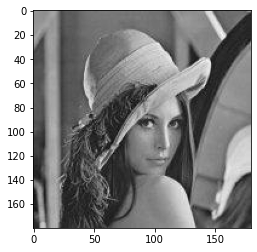

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('E:\\py基础\\作业\\CNN\\le.jpg').convert('L')
plt.imshow(img, cmap='gray')


3
3
5


Text(0.5, 1.0, 'gauss kernel_size=5')

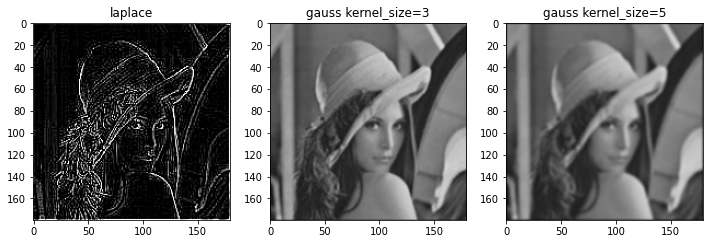

In [15]:
#  拉普拉斯
laplace_kernel = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

# 高斯
gauss_kernel3 = (1/ 16) * np.array([[1, 2, 1], 
                                   [2, 4, 2], 
                                   [1, 2, 1]])

# size为5的高斯
gauss_kernel5 = (1/ 84) * np.array([[1, 2, 3, 2, 1],
                                    [2, 5, 6, 5, 2], 
                                    [3, 6, 8, 6, 3],
                                    [2, 5, 6, 5, 2],
                                    [1, 2, 3, 2, 1]])

fig, ax = plt.subplots(1, 3, figsize=(12, 8))

laplace_img = convolution(np.array(img), laplace_kernel, padding=1, stride=1)
ax[0].imshow(Image.fromarray(laplace_img), cmap='gray')
ax[0].set_title('laplace')

gauss3_img = convolution(np.array(img), gauss_kernel3, padding=1, stride=1)
ax[1].imshow(Image.fromarray(gauss3_img), cmap='gray')
ax[1].set_title('gauss kernel_size=3')

gauss5_img = convolution(np.array(img), gauss_kernel5, padding=2, stride=1)
ax[2].imshow(Image.fromarray(gauss5_img), cmap='gray')
ax[2].set_title('gauss kernel_size=5')


In [29]:
#一维卷积函数的实现
from torch.nn import Conv1d
from torch.nn import functional as F
import torch
from torch.nn import Linear
from torch.nn import MaxPool1d

In [7]:
#定义一个一维卷积 输入通道大小为5 输出通道为2 卷积核大小为4
conv1 = Conv1d(5,2,4)
#定义一个一维卷积 输入通道大小为5 输出通道为2 卷积核大小为3
conv2 = Conv1d(5,2,3)
#定义输入
inputs = torch.rand(2,5,6)
#输出卷积之后的结果
outputs1 = conv1(inputs)
outputs2 = conv2(inputs)
print(outputs1)
print(outputs2)

tensor([[[-0.1657, -0.0823, -0.3577],
         [ 0.5771,  0.4135,  0.5275]],

        [[-0.1912, -0.1458, -0.0212],
         [ 0.2192,  0.1956, -0.0621]]], grad_fn=<SqueezeBackward1>)
tensor([[[-0.0788, -0.2624, -0.3654, -0.2205],
         [-0.1701, -0.2014, -0.0934, -0.4040]],

        [[-0.5099, -0.1957, -0.4562, -0.4665],
         [ 0.1293,  0.0792,  0.1022, -0.3812]]], grad_fn=<SqueezeBackward1>)


In [16]:
#最大值池化
pool1 = MaxPool1d(3) #定义一个池化层，池化层的核大小是3 == 卷积核的核宽度
pool2 = MaxPool1d(4)

outputs1_max = pool1(outputs1)
outputs2_max = pool2(outputs2)
print(outputs1_max.size())
print(outputs2_max)

torch.Size([2, 2, 1])
tensor([[[-0.0788],
         [-0.0934]],

        [[-0.1957],
         [ 0.1293]]], grad_fn=<SqueezeBackward1>)


In [14]:
#另一种求最大值池化的方法
outputs1_maxpool = F.max_pool1d(outputs1,kernel_size = outputs1.shape[2])
outputs2_maxpool = F.max_pool1d(outputs2,kernel_size = outputs2.shape[2])

In [31]:
#链接全连接层
#这里有个问题 书上给的参数是dim=2 但是报错 expected to be in range of [-2, 1], but got 2，很怪
outputs1_max_squeeze = outputs1_max.squeeze() #将为1的维度删掉
outputs2_max_squeeze = outputs2_max.squeeze()
        
outputs_fully = torch.cat([outputs1_max_squeeze,outputs2_max_squeeze],dim=1)
print(outputs_fully)
linear = Linear(4,2)
output = linear(outputs_fully)
print(output)

tensor([[-0.0823,  0.5771, -0.0788, -0.0934],
        [-0.0212,  0.2192, -0.1957,  0.1293]], grad_fn=<CatBackward>)
tensor([[-0.2726, -0.6327],
        [-0.4297, -0.6452]], grad_fn=<AddmmBackward>)
